# 高斯带阻滤波

In [18]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pyexcel_xls import get_data

In [19]:
'''
% 频域滤波
% 函数输入：
%       X：输入的空域图像矩阵，double类型
%       H，频域滤波器，一般为图像X的2倍时较好
% 函数输出：
%       Z：输出的空域图像局长呢，数据类型为double类型
 % 二维傅里叶变换
'''
def fftfilt2(X,H):
    F = np.fft.fft2(X)
    Z = H * F
    Z = np.fft.ifftshift(Z)
    Z = np.abs(np.fft.ifft2(Z))
    return np.abs(Z)

In [20]:
def noise_gaussian(M,N,a = 0,b=1):
    R = a + b * np.random.randn(M,N)
    return R

In [21]:
'''
% 高斯带阻滤波器
% input:
%     指定滤波器的类型’gaussian’
%     M,N:频域滤波器的尺寸
%     D0：带阻滤波器的截止频率
% output:
%       H：M x N的矩阵，表示频域滤波器矩阵，数据类型为double，
'''
def freqfilter_guassian_kernel(M,N,D0,W):
    u = np.arange(-M//2,M//2)
    v = np.arange(-N//2,N//2)
    [U,V] = np.meshgrid(u,v)
    D = np.sqrt(U ** 2+V ** 2)
    eps = 1.0e-5
    H = 1-np.exp(-(1/2)*((D ** 2-D0 ** 2)/(D*W + eps))**2);
    return H

In [22]:
src = cv2.cvtColor(cv2.imread('../../datas/f3.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [23]:
D0 = 10; # 阻止的频率点与频域中心的距离
W = 10;  # 带宽

In [24]:
rows,cols = gray.shape

In [25]:
H = freqfilter_guassian_kernel(cols,rows,D0,W)

In [26]:
rows,cols = gray.shape
noise = noise_gaussian(rows,cols,a=0,b=0.1)
src_noise_gray = gray.astype(np.float32) + noise * 255

src_noise = np.zeros(src.shape,dtype=np.float64)
src_noise[:,:,0] = np.float64(src[:,:,0]) + noise * 255
src_noise[:,:,1] = np.float64(src[:,:,1]) + noise * 255
src_noise[:,:,2] = np.float64(src[:,:,2]) + noise * 255

src_noise[src_noise < 0] = 0
src_noise[src_noise > 255] = 255
src_noise = src_noise.astype(np.uint8)

In [27]:
r = fftfilt2(src[:,:,0].astype(np.float32) / 255.0,H)
g = fftfilt2(src[:,:,1].astype(np.float32) / 255.0,H)
b = fftfilt2(src[:,:,2].astype(np.float32) / 255.0,H)

In [28]:
dst = cv2.merge([r,g,b])
dst = dst * 255
dst[dst < 0] = 0
dst[dst > 255] = 255
dst = dst.astype(np.uint8)

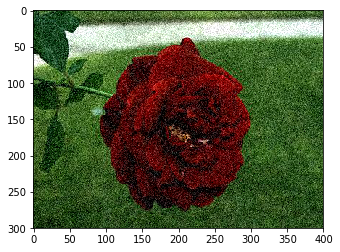

In [29]:
plt.imshow(src_noise)

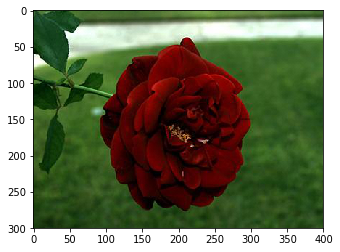

In [30]:
plt.imshow(dst)